# Vehicle MSRP Prediction
## Inferential Statistics by Darren Lyles

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy
import requests
import warnings

In [2]:
car_df = pd.read_csv('Car_Features_and_MSRP/data2017_cleaned.csv')
car_df.head()

,Unnamed: 0,Unnamed: 0.1,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,0,0,FIAT,124 Spider,2017,premium unleaded (recommended),160.0,4.0,MANUAL,rear wheel drive,2.0,Compact,Convertible,35,26,819,27495
1,1,1,FIAT,124 Spider,2017,premium unleaded (recommended),160.0,4.0,MANUAL,rear wheel drive,2.0,Compact,Convertible,35,26,819,24995
2,2,2,FIAT,124 Spider,2017,premium unleaded (recommended),160.0,4.0,MANUAL,rear wheel drive,2.0,Compact,Convertible,35,26,819,28195
3,3,3,BMW,2 Series,2017,premium unleaded (recommended),335.0,6.0,AUTOMATIC,all wheel drive,2.0,Compact,Coupe,31,21,3916,46450
4,4,4,BMW,2 Series,2017,premium unleaded (recommended),335.0,6.0,AUTOMATIC,rear wheel drive,2.0,Compact,Convertible,32,21,3916,49050


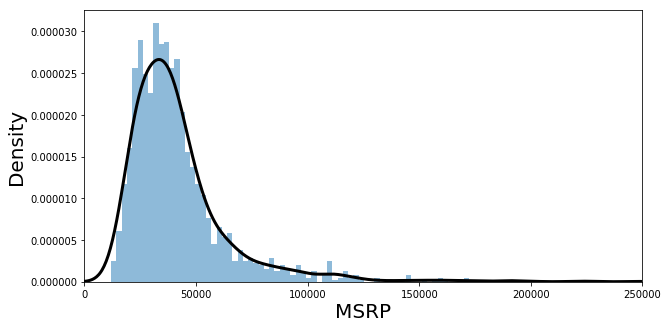

In [3]:
plt.rcParams["figure.figsize"] = (10, 5)
plt.xlim(0, 250000)
plt.xlabel('MSRP', size=20)
plt.ylabel('Density', size=20)
plt.hist(car_df.MSRP, bins=100, density=True, alpha=0.5)
car_df.MSRP.plot.density(color='black', linewidth=3)
plt.show()

<p>Above we find a normalized histogram consisting of all the available MSRPs in the dataset.  To add more perspsective, I added a probability distribution function so that I could get a smooth approximation of the MSRP distribution.  We can see that the distribution is heavily skewed to the right and from that alone, it does not satisfy normality.
</p>

In [4]:
scipy.stats.normaltest(car_df.MSRP)

NormaltestResult(statistic=1108.7312658893877, pvalue=1.7460820804353996e-241)

<p>Here I computed the statistic $s^2+k^2$, where $s$ is the $z$-score computed by the skewtest and $k$ is the $z$-score computed by the kurtosis test. The second element is the $p$-value for the 2-sided ${\chi}^2$ probability that the distribution is normal.  The $p$-value obtained is nearly $0$ and this confirms our visual inspection that the MSRPs are not normally distributed.
</p>

In [5]:
car_df.MSRP.min(), car_df.MSRP.max()

(11990, 247900)

<p>Here I determined the minimum and maximum MSRPs in the data set. Below, are the mean, median, and standard deviations of the MSRP for different car brands and a bar graph visualization.</p>

In [6]:
MSRP_means = car_df.groupby('Make').mean().MSRP.round(2)
MSRP_means

Make
Acura             45643.33
Audi              55039.13
BMW               63196.84
Buick             34273.46
Cadillac          61777.01
Chevrolet         40559.65
Chrysler          33307.92
Dodge             42565.19
FIAT              23159.47
Ford              36816.28
GMC               42838.91
Genesis           46616.67
Honda             28119.49
Hyundai           27564.50
Infiniti          43528.57
Kia               28240.35
Land Rover        48753.18
Lexus             51000.15
Lincoln           48855.43
Lotus             91900.00
Maserati         103015.38
Mazda             22701.25
Mercedes-Benz     81890.95
Mitsubishi        21229.48
Nissan            32493.85
Porsche          106912.00
Subaru            27161.70
Toyota            34028.85
Volkswagen        29772.00
Volvo             45946.00
Name: MSRP, dtype: float64

In [7]:
MSRP_medians = car_df.groupby('Make').median().MSRP.round(2)
MSRP_medians

Make
Acura             41835.0
Audi              47000.0
BMW               52300.0
Buick             34040.0
Cadillac          59195.0
Chevrolet         37425.0
Chrysler          33417.5
Dodge             37140.0
FIAT              23335.0
Ford              35630.0
GMC               41412.5
Genesis           43900.0
Honda             26215.0
Hyundai           26300.0
Infiniti          43800.0
Kia               27000.0
Land Rover        46595.0
Lexus             47615.0
Lincoln           46060.0
Lotus             91900.0
Maserati         109500.0
Mazda             22695.0
Mercedes-Benz     62600.0
Mitsubishi        22095.0
Nissan            31290.0
Porsche          103400.0
Subaru            25995.0
Toyota            33100.0
Volkswagen        28995.0
Volvo             46350.0
Name: MSRP, dtype: float64

In [8]:
MSRP_std_devs = car_df.groupby('Make').std().MSRP.round(2)
MSRP_std_devs

Make
Acura            20845.00
Audi             27241.56
BMW              24956.39
Buick             7159.33
Cadillac         17054.77
Chevrolet        18051.18
Chrysler          6605.37
Dodge            21528.86
FIAT              3921.26
Ford             12202.08
GMC              11185.42
Genesis           6983.25
Honda             7027.83
Hyundai           6670.53
Infiniti          5091.05
Kia               8555.09
Land Rover        7386.37
Lexus            14521.32
Lincoln          12216.69
Lotus                0.00
Maserati         25238.23
Mazda             2762.06
Mercedes-Benz    50671.05
Mitsubishi        4809.02
Nissan           12636.52
Porsche          42183.13
Subaru            5548.79
Toyota           10205.05
Volkswagen        7954.00
Volvo             6432.29
Name: MSRP, dtype: float64

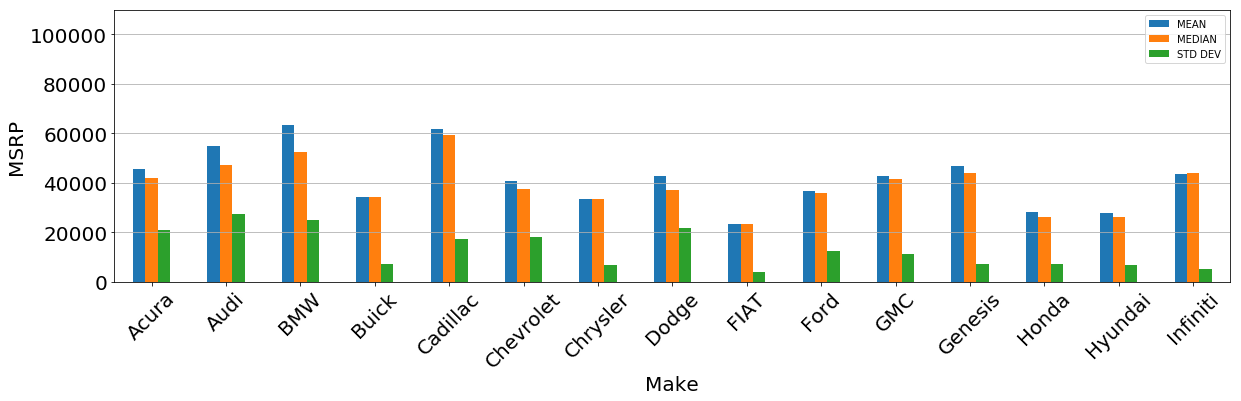

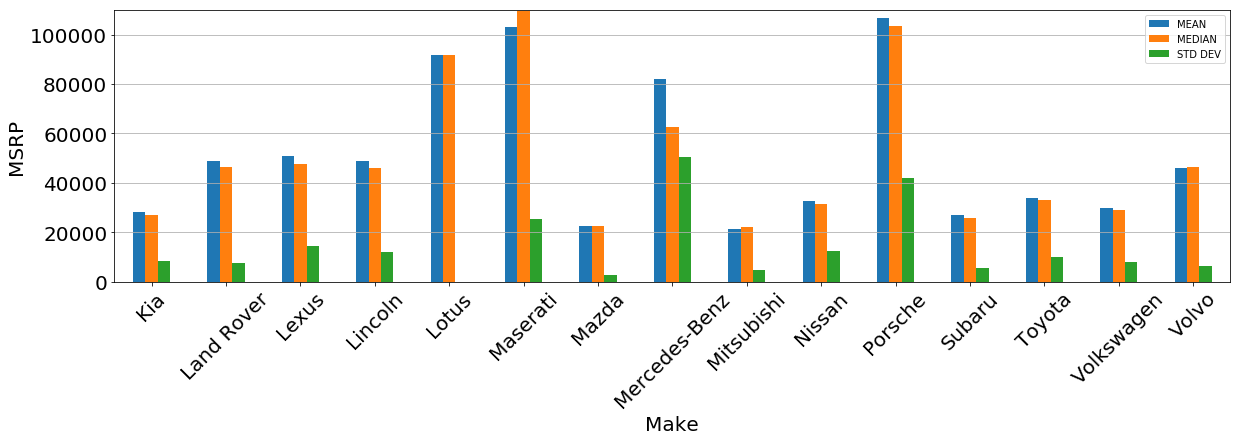

In [9]:
plt.rcParams["figure.figsize"] = (20, 5)
pd.concat([MSRP_means.rename('MEAN')[:15], 
           MSRP_medians.rename('MEDIAN')[:15], 
           MSRP_std_devs.rename('STD DEV')[:15]], axis=1).plot.bar()
plt.grid(axis='y')
plt.xticks(rotation=45, size=20)
plt.yticks(size=20)
plt.xlabel('Make', size=20)
plt.ylabel('MSRP', size=20)
plt.ylim(0, 110000)

pd.concat([MSRP_means.rename('MEAN')[15:], 
           MSRP_medians.rename('MEDIAN')[15:], 
           MSRP_std_devs.rename('STD DEV')[15:]], axis=1).plot.bar()
plt.grid(axis='y')
plt.xticks(rotation=45, size=20)
plt.yticks(size=20)
plt.xlabel('Make', size=20)
plt.ylabel('MSRP', size=20)
plt.ylim(0, 110000)
plt.show()

<p>
    Below are the summary statistics for the MSRP categorized by transmission type.  Again, the summary statistics are mean, median, and standard deviation.  For analyzing this bar chart, it is best to look at the medians since outliers such as significantly higher priced vehicles may have noticably skewed the mean away from the median.
</p>

In [10]:
transmission_means = car_df.groupby('Transmission Type').mean().MSRP.round(2)
transmission_means

Transmission Type
AUTOMATED_MANUAL    51429.54
AUTOMATIC           41846.39
DIRECT_DRIVE        35023.89
MANUAL              40372.15
Name: MSRP, dtype: float64

In [11]:
transmission_medians = car_df.groupby('Transmission Type').median().MSRP.round(2)
transmission_medians

Transmission Type
AUTOMATED_MANUAL    37820.0
AUTOMATIC           37162.5
DIRECT_DRIVE        36620.0
MANUAL              29645.0
Name: MSRP, dtype: float64

In [12]:
transmission_std_devs = car_df.groupby('Transmission Type').std().MSRP.round(2)
transmission_std_devs

Transmission Type
AUTOMATED_MANUAL    40357.18
AUTOMATIC           22145.82
DIRECT_DRIVE         7330.74
MANUAL              26743.27
Name: MSRP, dtype: float64

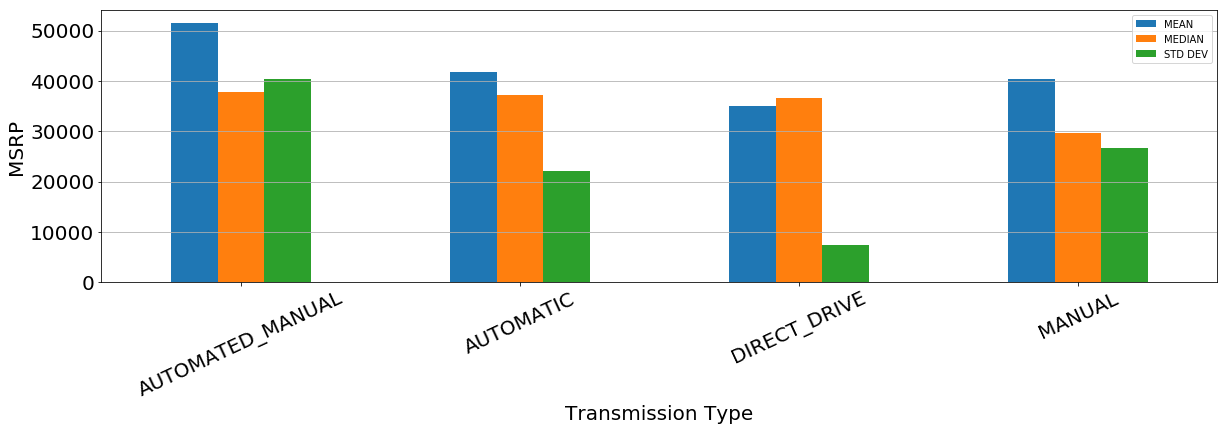

In [13]:
pd.concat([transmission_means.rename('MEAN'), 
           transmission_medians.rename('MEDIAN'), 
           transmission_std_devs.rename('STD DEV')], axis=1).plot.bar()
plt.grid(axis='y')
plt.xticks(rotation=25, size=20)
plt.yticks(rotation=0, size=20)
plt.xlabel('Transmission Type', size=20)
plt.ylabel('MSRP', size=20)
plt.show()

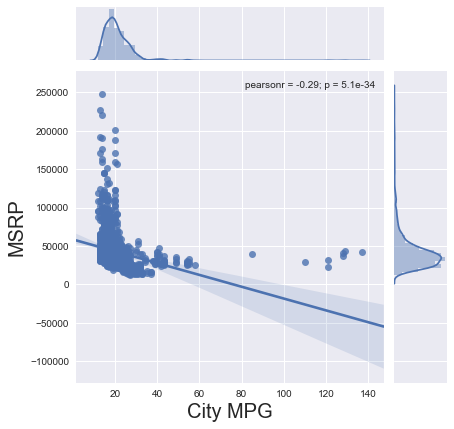

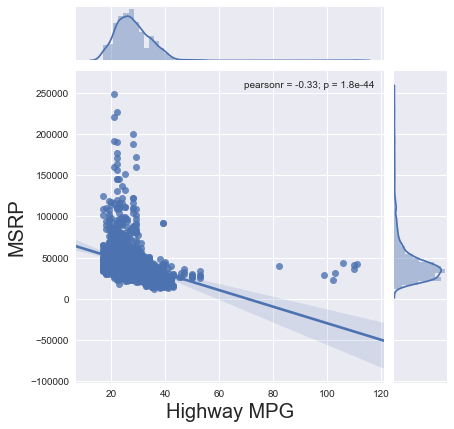

In [18]:
warnings.filterwarnings('ignore')
sns.set()
sns.jointplot(x='city mpg', y='MSRP', data=car_df, kind='reg')
plt.xlabel('City MPG', size=20)
plt.ylabel('MSRP', size=20)
sns.jointplot(x='highway MPG', y='MSRP', data=car_df, kind='reg')
plt.xlabel('Highway MPG', size=20)
plt.ylabel('MSRP', size=20)
plt.show()

<p>Above I have the MSRP plotted against the city and highway MPG.  Statistically speaking, there is a weak negative correlation between MSRP and MPG. Naturally, a weak correlation coefficient also results in a small coefficient of determination, or $R^2$.  Here are the coefficients listed here:
    <ul>
        <li>MSRP vs. City MPG: &emsp;&emsp;&emsp;&nbsp;&nbsp; $R=-0.29$ &emsp; $R^2=0.0841$</li>
        <li>MSRP vs. Highway MPG:                      &emsp; $R=-0.33$ &emsp; $R^2=0.1089$</li>
    </ul>
    Below is the MSRP plotted against engine horsepower.  This relationship show a positive correlation between the 
    two independent variables.  This clearly tells us that the higher horespower of a vehicle, the higher the MSRP it 
    will most likely be. Compared to the relationship betwen MSRP and city/highway MPG, the MSRP vs. engine HP 
    correlation has a much better goodness of fit and a wider spread of datapoints.
    <ul>
        <li>MSRP vs. Engine HP: &emsp;&emsp;&emsp;&nbsp; $R=0.78$ &emsp; $R^2=0.6084$</li>
    </ul>
</p>

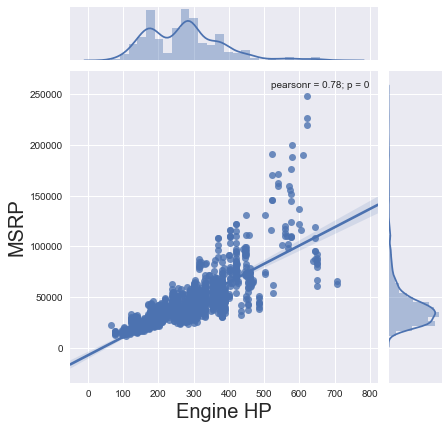

In [19]:
sns.jointplot(x='Engine HP', y='MSRP', data=car_df, kind='reg')
plt.xlabel('Engine HP', size=20)
plt.ylabel('MSRP', size=20)
plt.show()